In [136]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Activation
import numpy as np

In [197]:
model = Sequential([
    Dense(64,input_shape=(100,),activation='relu'),
    Dense(128,input_shape=(100,),activation='relu'),
    Dense(4,activation='softmax')])
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [201]:
model.count_params()
model.weights

[<tf.Variable 'dense_32/kernel:0' shape=(100, 64) dtype=float32_ref>,
 <tf.Variable 'dense_32/bias:0' shape=(64,) dtype=float32_ref>,
 <tf.Variable 'dense_33/kernel:0' shape=(64, 128) dtype=float32_ref>,
 <tf.Variable 'dense_33/bias:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'dense_34/kernel:0' shape=(128, 4) dtype=float32_ref>,
 <tf.Variable 'dense_34/bias:0' shape=(4,) dtype=float32_ref>]

In [187]:
model = Sequential()
model.add(Dense(units=64,input_dim=100))
model.add(Activation('relu'))
model.add(Dense(units=4))
model.add(Activation('softmax'))
# 类似于构建了一个多层感知机  # Dense 主要用于 全连接层。
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

#model.compile(loss=keras.losses.categorical_crossentropy,
#              optimizer=keras.optimizers.SGD(lr=0.001,momentum=0.9,nesterov=True),
 #            metrics = ['accuracy'])

In [165]:
def build_data(m, n, classes, rate=1.1):
    y = []
    data = []
    for i in range(classes):
        temp_classlabel = np.repeat(i,m).tolist()  
        temp_data = np.random.random((m, n)) + rate * i    
        y.extend(temp_classlabel)
        data.extend(temp_data.tolist()) #np.repeat(1,5).tolist() 这里很重要
       
    N = m * classes
    y_ = np.zeros((N,classes))
    for i in  range(N):
        for j in range(classes):
            if y[i] == j:
                y_[i][j] = 1
    return np.array(data),y_

train_x, train_y = build_data(10000,100,4,rate = 1.1)

In [198]:
re = model.fit(train_x,train_y,epochs=10,batch_size=40)

Epoch 1/10
40000/40000 [==============================] - 1s - loss: 0.4605 - acc: 0.7881     
Epoch 2/10
40000/40000 [==============================] - 1s - loss: 0.2356 - acc: 0.8999     
Epoch 3/10
40000/40000 [==============================] - 1s - loss: 0.1546 - acc: 0.9381     
Epoch 4/10
40000/40000 [==============================] - 1s - loss: 0.1163 - acc: 0.9583     
Epoch 5/10
40000/40000 [==============================] - 1s - loss: 0.2334 - acc: 0.9615     
Epoch 6/10
40000/40000 [==============================] - 1s - loss: 4.8347 - acc: 0.6935     
Epoch 7/10
40000/40000 [==============================] - 1s - loss: 2.0172 - acc: 0.8591     
Epoch 8/10
40000/40000 [==============================] - 1s - loss: 8.0590 - acc: 0.5000     
Epoch 9/10
40000/40000 [==============================] - 1s - loss: 8.0590 - acc: 0.5000     
Epoch 10/10
40000/40000 [==============================] - 1s - loss: 8.0590 - acc: 0.5000     


In [189]:
test_x,test_y = build_data(1000,100,4,rate=1.01)

In [190]:
# 模型性能评价。
loss_test = model.evaluate(test_x,test_y)
loss_test

2592/4000 [==================>...........] - ETA: 0s

[0.06247888085618615, 1.0]

In [191]:
class_pred = model.predict(test_x)
sum(class_pred.argmax(1)==test_y.argmax(1))/np.shape(test_x)[0]

1.0

In [202]:
import keras.backend as K

In [206]:
def mean_pred(class_pred,test_y):
    return K.mean(class_pred)
x = np.array([1,2,3])
mean_pred(test_y)

AttributeError: 'numpy.dtype' object has no attribute 'base_dtype'

In [213]:
model = Sequential()
model.add(Dense(32,activation='relu',input_dim=100))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

data = np.random.random((1000,100))
labels = np.random.randint(2,size=((1000,1)))

model.fit(data,labels,epochs=10,batch_size=32)

Epoch 1/10
1000/1000 [==============================] - 0s - loss: 0.7058 - acc: 0.5130     
Epoch 2/10
1000/1000 [==============================] - 0s - loss: 0.6966 - acc: 0.5130     
Epoch 3/10
1000/1000 [==============================] - 0s - loss: 0.6896 - acc: 0.5430     
Epoch 4/10
1000/1000 [==============================] - 0s - loss: 0.6856 - acc: 0.5600     
Epoch 5/10
1000/1000 [==============================] - 0s - loss: 0.6829 - acc: 0.5570     
Epoch 6/10
1000/1000 [==============================] - 0s - loss: 0.6772 - acc: 0.5760     
Epoch 7/10
1000/1000 [==============================] - 0s - loss: 0.6761 - acc: 0.5680     
Epoch 8/10
1000/1000 [==============================] - 0s - loss: 0.6723 - acc: 0.5810     
Epoch 9/10
1000/1000 [==============================] - 0s - loss: 0.6661 - acc: 0.5940     
Epoch 10/10
1000/1000 [==============================] - 0s - loss: 0.6663 - acc: 0.6150     


In [217]:
oneh = keras.utils.to_categorical(labels,num_classes=2)
oneh

array([[ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       ..., 
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.]])

In [218]:
from keras.layers import  LSTM

In [219]:
data_dim = 16
timesteps = 8
num_classes = 10

In [220]:
model = Sequential()
model.add(LSTM(32,return_sequences=True,input_shape=(timesteps,data_dim)))
model.add(LSTM(32,return_sequences=True))
model.add(LSTM(32))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
x_train = np.random.random((1000,timesteps,data_dim))
y_train = np.random.random((1000,num_classes))

x_val = np.random.random((100,timesteps,data_dim))
y_val = np.random.random((100,num_classes))

model.fit(x_train,y_train,batch_size=64,epochs=5,validation_data=(x_val,y_val))

Train on 1000 samples, validate on 100 samples
Epoch 1/5
1000/1000 [==============================] - 2s - loss: 11.4975 - acc: 0.0970 - val_loss: 11.9283 - val_acc: 0.1300
Epoch 2/5
1000/1000 [==============================] - 0s - loss: 11.4951 - acc: 0.1130 - val_loss: 11.9251 - val_acc: 0.1200
Epoch 3/5
1000/1000 [==============================] - 0s - loss: 11.4944 - acc: 0.1120 - val_loss: 11.9268 - val_acc: 0.1000
Epoch 4/5
1000/1000 [==============================] - 0s - loss: 11.4948 - acc: 0.1020 - val_loss: 11.9257 - val_acc: 0.1200
Epoch 5/5
1000/1000 [==============================] - 0s - loss: 11.4945 - acc: 0.1140 - val_loss: 11.9288 - val_acc: 0.1000


In [225]:
data_dim = 16
timesteps = 8
num_classes = 10
batch_size = 32

model = Sequential()
model.add(LSTM(32,return_sequences = True,stateful = True,batch_input_shape = (batch_size,timesteps,data_dim)))
model.add(LSTM(32,return_sequences = True,stateful = True))
model.add(LSTM(32,stateful=True))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics = ['accuracy'])
x_train = np.random.random((batch_size * 10, timesteps, data_dim))
y_train = np.random.random((batch_size * 10, num_classes))

# Generate dummy validation data
x_val = np.random.random((batch_size * 3, timesteps, data_dim))
y_val = np.random.random((batch_size * 3, num_classes))

model.fit(x_train, y_train,batch_size=batch_size, epochs=5, shuffle=False,
          validation_data=(x_val, y_val))

Train on 320 samples, validate on 96 samples
Epoch 1/5
320/320 [==============================] - 2s - loss: 11.3604 - acc: 0.1000 - val_loss: 11.5452 - val_acc: 0.1458
Epoch 2/5
320/320 [==============================] - 0s - loss: 11.3539 - acc: 0.0875 - val_loss: 11.5423 - val_acc: 0.0938
Epoch 3/5
320/320 [==============================] - 0s - loss: 11.3527 - acc: 0.0875 - val_loss: 11.5416 - val_acc: 0.0729
Epoch 4/5
320/320 [==============================] - ETA: 0s - loss: 11.3274 - acc: 0.07 - 0s - loss: 11.3520 - acc: 0.0875 - val_loss: 11.5411 - val_acc: 0.0729
Epoch 5/5
320/320 [==============================] - 0s - loss: 11.3514 - acc: 0.0938 - val_loss: 11.5407 - val_acc: 0.0833


In [9]:
import keras
import numpy as np
from keras.layers import Dense
from keras.models import Model

In [68]:
x = np.random.randn(10000, 128)
y = np.random.randint(2, size=(10,2))
# x[10]

In [69]:
x_input = keras.layers.Input(shape=(128, ))
x_encoder = Dense(64,activation="relu")(x_input)
x_encoder = Dense(32, activation="relu")(x_encoder)
mode1_1 = Model(x_input, x_encoder)

x_decoder = Dense(32, activation="relu")(x_encoder)
x_decoder = Dense(64, activation="relu")(x_decoder)
x_decoder = Dense(128, activation="relu")(x_decoder)
model_2 = Model(x_input, x_decoder)

In [70]:
print(mode1_1.summary())
print(model_2.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 128)               0         
_________________________________________________________________
dense_51 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_52 (Dense)             (None, 32)                2080      
Total params: 10,336
Trainable params: 10,336
Non-trainable params: 0
_________________________________________________________________
None
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 128)               0         
_________________________________________________________________
dense_51 (Dense)             (None, 64)                8256      
_________________________________________________________________
d

In [71]:
model_2.compile(optimizer="rmsprop", loss="mean_squared_error", metrics=["mae"])
model_2.fit(x, x, batch_size=128, epochs=10)

Epoch 1/10
10000/10000 [==============================] - 1s 70us/step - loss: 0.9952 - mean_absolute_error: 0.7958
Epoch 2/10
10000/10000 [==============================] - 0s 19us/step - loss: 0.9744 - mean_absolute_error: 0.7873
Epoch 3/10
10000/10000 [==============================] - 0s 19us/step - loss: 0.9594 - mean_absolute_error: 0.7810
Epoch 4/10
10000/10000 [==============================] - 0s 18us/step - loss: 0.9492 - mean_absolute_error: 0.7766
Epoch 5/10
10000/10000 [==============================] - 0s 19us/step - loss: 0.9415 - mean_absolute_error: 0.7734
Epoch 6/10
10000/10000 [==============================] - 0s 19us/step - loss: 0.9350 - mean_absolute_error: 0.7705
Epoch 7/10
10000/10000 [==============================] - 0s 19us/step - loss: 0.9293 - mean_absolute_error: 0.7680
Epoch 8/10
10000/10000 [==============================] - 0s 22us/step - loss: 0.9247 - mean_absolute_error: 0.7660
Epoch 9/10
10000/10000 [==============================] - 0s 23us/step -

# Auto-Encoder 研究

In [63]:
import numpy as np
np.random.seed(1)  
from keras.datasets import mnist
from keras.models import Model 
from keras.layers import Dense, Input
import matplotlib.pyplot as plt
 

(x_train, _), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255. - 0.5       
x_test = x_test.astype('float32') / 255. - 0.5         
x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))
print(x_train.shape)
print(x_test.shape)

11493376/11490434 [==============================] - 44s 4us/step
(60000, 784)
(10000, 784)


In [72]:
encoding_dim = 2
 
# this is our input placeholder
input_img = Input(shape=(784,))
 
# encode
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(10, activation='relu')(encoded)
encoder_output = Dense(encoding_dim)(encoded)
 
# decode
decoded = Dense(10, activation='relu')(encoder_output)
decoded = Dense(64, activation='relu')(decoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='tanh')(decoded)
 
# autoencode
autoencoder = Model(inputs=input_img, outputs=decoded)
# compress
encoder = Model(inputs=input_img, outputs=encoder_output)
# compile autoencoder
autoencoder.compile(optimizer='adam', loss='mse', metrics=["mae"])

In [73]:
# 各类辅助
from keras.callbacks import EarlyStopping, TensorBoard, ReduceLROnPlateau,CSVLogger,ModelCheckpoint, TerminateOnNaN

In [ ]:
# keras.callbacks.LearningRateScheduler(schedule, verbose=0)
ter_nan = TerminateOnNaN()
# early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0,
#                            mode='auto', baseline=None)
tensor_board = TensorBoard(log_dir='./logs', histogram_freq=0, batch_size=256,
                            write_graph=True, write_grads=False, write_images=False, 
                            embeddings_freq=0, embeddings_layer_names=None, 
                            embeddings_metadata=None, embeddings_data=None)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)
csv_log = CSVLogger("./csv_log.csv", separator=',', append=True) # false or true 
checkpointer = ModelCheckpoint(filepath='./auto_model.hdf5', verbose=1, save_best_only=True)

In [109]:
# training
history = autoencoder.fit(x_train, x_train, epochs=20, batch_size=256, shuffle=True,
                          validation_data=(x_test, x_test), verbose=1,
                         callbacks=[checkpointer, csv_log, reduce_lr, tensor_board, ter_nan])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 35us/step - loss: 0.0375 - val_loss: 0.0376

Epoch 00001: val_loss improved from inf to 0.03764, saving model to ./auto_model.hdf5
Epoch 2/20
60000/60000 [==============================] - 2s 36us/step - loss: 0.0388 - val_loss: 0.0379

Epoch 00002: val_loss did not improve from 0.03764
Epoch 3/20
60000/60000 [==============================] - 2s 35us/step - loss: 0.0375 - val_loss: 0.0375

Epoch 00003: val_loss improved from 0.03764 to 0.03748, saving model to ./auto_model.hdf5
Epoch 4/20
60000/60000 [==============================] - 2s 35us/step - loss: 0.0382 - val_loss: 0.0402

Epoch 00004: val_loss did not improve from 0.03748
Epoch 5/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.0381 - val_loss: 0.0372

Epoch 00005: val_loss improved from 0.03748 to 0.03725, saving model to ./auto_model.hdf5
Epoch 6/20
60000/60000 [============================

In [110]:
history.history.keys()

dict_keys(['val_loss', 'loss', 'lr'])

In [111]:
np.round(history.history['val_loss'], 4)

array([0.0376, 0.0379, 0.0375, 0.0402, 0.0372, 0.0371, 0.0372, 0.0373,
       0.0374, 0.038 , 0.037 , 0.037 , 0.0374, 0.0371, 0.0372, 0.0371,
       0.0369, 0.0371, 0.0371, 0.0373])

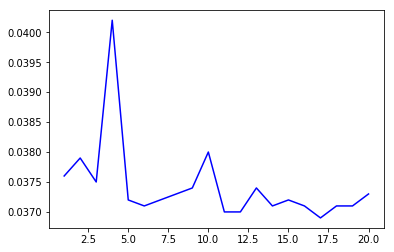

In [112]:
plt.plot(np.arange(1, 21), np.round(history.history['val_loss'], 4), color='blue')
plt.show()

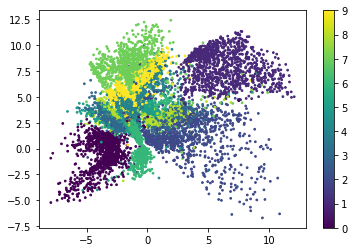

In [113]:
 # plotting
encoded_imgs = encoder.predict(x_test)
plt.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1], c=y_test, s=3)
plt.colorbar()
plt.show()

In [114]:
#mode1_1.summary()
autoencoder.evaluate(x_test[:10], x_test[:10]) # 利用第三方数据进行验证的
encoder.predict(x_test[:10]) # 降维的用处的

10/10 [==============================] - 0s 129us/step


array([[-1.6282746 ,  9.245426  ],
       [ 4.793527  ,  2.0066805 ],
       [ 8.1989565 ,  9.15797   ],
       [-3.3933747 ,  0.90067524],
       [-1.8969353 ,  4.288706  ],
       [ 7.3700333 ,  8.401697  ],
       [ 0.05333103,  6.807068  ],
       [-1.829576  ,  3.29573   ],
       [-1.3131799 ,  2.1974268 ],
       [-1.5873148 ,  5.7590938 ]], dtype=float32)

In [116]:
x_test.shape

(10000, 784)

In [120]:
# 转换变化：
x_train_new = x_train.reshape(6000, 10 ,784)
x_test_new = x_test.reshape(1000, 10, 784)

In [131]:
from keras.layers import Input, Dense
from keras.models import Model

# This returns a tensor
inputs = Input(shape=(784,))

# a layer instance is callable on a tensor, and returns a tensor
x = Dense(64, activation='relu')(inputs)
x = Dense(64, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

# This creates a model that includes
# the Input layer and three Dense layers
model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

y_test_test = keras.utils.to_categorical(y_test, num_classes=10)
model.fit(x_test, y_test_test, epochs=10, batch_size=128, verbose=1)

Epoch 1/10
10000/10000 [==============================] - 1s 58us/step - loss: 1.0493 - acc: 0.6948
Epoch 2/10
10000/10000 [==============================] - 0s 17us/step - loss: 0.4437 - acc: 0.8682
Epoch 3/10
10000/10000 [==============================] - 0s 18us/step - loss: 0.3391 - acc: 0.8977
Epoch 4/10
10000/10000 [==============================] - 0s 18us/step - loss: 0.2891 - acc: 0.9137
Epoch 5/10
10000/10000 [==============================] - 0s 16us/step - loss: 0.2571 - acc: 0.9204
Epoch 6/10
10000/10000 [==============================] - 0s 17us/step - loss: 0.2299 - acc: 0.9300
Epoch 7/10
10000/10000 [==============================] - 0s 17us/step - loss: 0.2105 - acc: 0.9348
Epoch 8/10
10000/10000 [==============================] - 0s 17us/step - loss: 0.1917 - acc: 0.9402
Epoch 9/10
10000/10000 [==============================] - 0s 17us/step - loss: 0.1719 - acc: 0.9474
Epoch 10/10
10000/10000 [==============================] - 0s 17us/step - loss: 0.1599 - acc: 0.9503

In [133]:
x = Input(shape=(784, ))
y = model(x)

In [169]:
# 
from keras.layers import TimeDistributed

# Input tensor for sequences of 20 timesteps,
# each containing a 784-dimensional vector
input_sequences = Input(shape=(10, 784))

# This applies our previous model to every timestep in the input sequences.
# the output of the previous model was a 10-way softmax,
# so the output of the layer below will be a sequence of 20 vectors of size 10.
processed_sequences = TimeDistributed(model)(input_sequences)
processed_sequences.shape

TensorShape([Dimension(None), Dimension(10), Dimension(10)])

In [170]:
from keras.layers import  LSTM, Activation

In [174]:
# model.add(LSTM(20, kernel_initializer="uniform"))
y1 = LSTM(10, kernel_initializer="uniform", return_sequences=True)(processed_sequences)
y2 = LSTM(1, activation="sigmoid")(y1)
# y3 = Activation("sigmoid")(y2)

new_model = Model(input_sequences, y2)

In [175]:
new_model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])

In [176]:
# processed_sequences.shape
new_model.fit(x_test_new,y_test[:1000], verbose=1, epochs=10,)

Epoch 1/10
1000/1000 [==============================] - 2s 2ms/step - loss: 2.8812 - acc: 0.0850
Epoch 2/10
1000/1000 [==============================] - 1s 559us/step - loss: 0.5018 - acc: 0.1020
Epoch 3/10
1000/1000 [==============================] - 1s 557us/step - loss: -3.4672 - acc: 0.1260
Epoch 4/10
1000/1000 [==============================] - 1s 563us/step - loss: -10.2174 - acc: 0.1260
Epoch 5/10
1000/1000 [==============================] - 1s 565us/step - loss: -19.5728 - acc: 0.1260
Epoch 6/10
1000/1000 [==============================] - 1s 565us/step - loss: -27.0580 - acc: 0.1260
Epoch 7/10
1000/1000 [==============================] - 1s 652us/step - loss: -29.0529 - acc: 0.1260
Epoch 8/10
1000/1000 [==============================] - 1s 585us/step - loss: -30.1617 - acc: 0.1260
Epoch 9/10
1000/1000 [==============================] - 1s 575us/step - loss: -31.0251 - acc: 0.1260
Epoch 10/10
1000/1000 [==============================] - 1s 573us/step - loss: -31.5499 - acc: 0.1

In [177]:
y_test.shape

(10000,)

In [178]:
x_test_new.shape

(1000, 10, 784)

In [179]:
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_25 (InputLayer)        (None, 10, 784)           0         
_________________________________________________________________
time_distributed_10 (TimeDis (None, 10, 10)            55050     
_________________________________________________________________
lstm_13 (LSTM)               (None, 10, 10)            840       
_________________________________________________________________
lstm_14 (LSTM)               (None, 1)                 48        
Total params: 55,938
Trainable params: 55,938
Non-trainable params: 0
_________________________________________________________________


In [180]:
# 多输入

In [185]:
a = Input(shape=(280, 256))
lstm = LSTM(32)
encoded_a = lstm(a)
assert lstm.output == encoded_a, "equal"

In [188]:
a = Input(shape=(280, 256))
b = Input(shape=(280, 256))

lstm = LSTM(32)
encoded_a = lstm(a)
encoded_b = lstm(b)

lstm.get_output_at(0)
lstm.get_output_at(1)

<tf.Tensor 'lstm_22_1/TensorArrayReadV3:0' shape=(?, 32) dtype=float32>

In [189]:
encoded_a

<tf.Tensor 'lstm_22/TensorArrayReadV3:0' shape=(?, 32) dtype=float32>

In [190]:
from keras.layers import Conv2D, Input

# input tensor for a 3-channel 256x256 image
x = Input(shape=(256, 256, 3))
# 3x3 conv with 3 output channels (same as input channels)
y = Conv2D(3, (3, 3), padding='same')(x)
# this returns x + y.
z = keras.layers.add([x, y])

In [191]:
z.shape

TensorShape([Dimension(None), Dimension(256), Dimension(256), Dimension(3)])

In [198]:
from keras.layers import Conv2D, MaxPooling2D, Input, Dense, Flatten
from keras.models import Model

# First, define the vision modules
digit_input = Input(shape=(27, 27, 1))
x = Conv2D(64, (3, 3))(digit_input)
print(x.shape)
x = Conv2D(64, (3, 3))(x)
print(x.shape)
x = MaxPooling2D((2, 2))(x)
print(x.shape)
out = Flatten()(x)
print(out.shape)

vision_model = Model(digit_input, out)

# Then define the tell-digits-apart model
digit_a = Input(shape=(27, 27, 1))
digit_b = Input(shape=(27, 27, 1))

# The vision model will be shared, weights and all
out_a = vision_model(digit_a)
print(out_a.shape)
out_b = vision_model(digit_b)

concatenated = keras.layers.concatenate([out_a, out_b])
print(concatenated.shape)
out = Dense(1, activation='sigmoid')(concatenated)

classification_model = Model([digit_a, digit_b], out)

(?, 25, 25, 64)
(?, 23, 23, 64)
(?, 11, 11, 64)
(?, ?)
(?, ?)
(?, ?)


In [193]:
x.shape

TensorShape([Dimension(None), Dimension(11), Dimension(11), Dimension(64)])

In [201]:
x_test.shape

(10000, 784)

In [202]:
28 * 28

784

In [204]:
x_test_new2 = x_test.reshape(10000 ,28, 28, 1)
x_test_new2.shape

(10000, 28, 28, 1)

In [209]:
from keras.layers import Conv2D, MaxPooling2D, Input, Dense, Flatten
from keras.models import Model

# First, define the vision modules
digit_input = Input(shape=(28, 28, 1))
x = Conv2D(64, (3, 3))(digit_input)
x = Conv2D(64, (3, 3))(x)
x = MaxPooling2D((2, 2))(x)
out = Flatten()(x)

vision_model = Model(digit_input, out)
vision_model.summary()

# Then define the tell-digits-apart model
digit_a = Input(shape=(28, 28, 1))
digit_b = Input(shape=(28, 28, 1))

# The vision model will be shared, weights and all
out_a = vision_model(digit_a)
out_b = vision_model(digit_b)

concatenated = keras.layers.concatenate([out_a, out_b])
out = Dense(1, activation='sigmoid')(concatenated)

classification_model = Model([digit_a, digit_b], out)
classification_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_62 (InputLayer)        (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 24, 24, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 9216)              0         
Total params: 37,568
Trainable params: 37,568
Non-trainable params: 0
_________________________________________________________________
__________________________________________________________________________________________________
Layer (type)                    Output 

In [210]:
28 * 28 * 9216

7225344

In [217]:
12 * 12 * 64  * 2 * 2 - 37568

-704

In [214]:
37568 / 9216

4.076388888888889

In [224]:
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.layers import Input, LSTM, Embedding, Dense
from keras.models import Model, Sequential

# First, let's define a vision model using a Sequential model.
# This model will encode an image into a vector.
vision_model = Sequential()
vision_model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)))
print(vision_model.summary())
vision_model.add(Conv2D(64, (3, 3), activation='relu'))
vision_model.add(MaxPooling2D((2, 2)))
print(vision_model.summary())
vision_model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
vision_model.add(Conv2D(128, (3, 3), activation='relu'))
vision_model.add(MaxPooling2D((2, 2)))
print(vision_model.summary())
vision_model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
vision_model.add(Conv2D(256, (3, 3), activation='relu'))
vision_model.add(Conv2D(256, (3, 3), activation='relu'))
vision_model.add(MaxPooling2D((2, 2)))
print(vision_model.summary())
vision_model.add(Flatten())
print(vision_model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_62 (Conv2D)           (None, 224, 224, 64)      1792      
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________
None
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_62 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 222, 222, 64)      36928     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 111, 111, 64)      0         
Total params: 38,720
Trainable params: 38,720
Non-trainable params: 0
_________________________________________________________________
None
____________________________________________________________

In [225]:
25 * 25 * 256

160000

In [232]:
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.layers import Input, LSTM, Embedding, Dense
from keras.models import Model, Sequential

# First, let's define a vision model using a Sequential model.
# This model will encode an image into a vector.
vision_model = Sequential()
vision_model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)))
vision_model.add(Conv2D(64, (3, 3), activation='relu'))
vision_model.add(MaxPooling2D((2, 2)))
vision_model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
vision_model.add(Conv2D(128, (3, 3), activation='relu'))
vision_model.add(MaxPooling2D((2, 2)))
vision_model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
vision_model.add(Conv2D(256, (3, 3), activation='relu'))
vision_model.add(Conv2D(256, (3, 3), activation='relu'))
vision_model.add(MaxPooling2D((2, 2)))
# print(vision_model.summary())
vision_model.add(Flatten())

# print(vision_model.summary())

# Now let's get a tensor with the output of our vision model:
image_input = Input(shape=(224, 224, 3))
encoded_image = vision_model(image_input)


# Next, let's define a language model to encode the question into a vector.
# Each question will be at most 100 word long,
# and we will index words as integers from 1 to 9999.
question_input = Input(shape=(100,), dtype='int32')
embedded_question = Embedding(input_dim=10000, output_dim=256, input_length=100)(question_input)
encoded_question = LSTM(256)(embedded_question)

print(encoded_question.shape)

# Let's concatenate the question vector and the image vector:
merged = keras.layers.concatenate([encoded_question, encoded_image])

print(merged.shape)

# And let's train a logistic regression over 1000 words on top:
output = Dense(1000, activation='softmax')(merged)

# This is our final model:
vqa_model = Model(inputs=[image_input, question_input], outputs=output)

(?, 256)
(?, ?)
